In [62]:
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np
# 셀 필수 환경 설정 먼저 실행 후 다음 셀 동작을 실행하세요
print('CUDA 가능:', torch.cuda.is_available())
print('PyTorch 버전:', torch.__version__)
print('CUDA 장치 수:', torch.cuda.device_count())
print('OpenCV 버전:', cv2.__version__)
print('OpenCV CUDA 장치 수:', cv2.cuda.getCudaEnabledDeviceCount() if hasattr(cv2, 'cuda') else 'CUDA 모듈 없음')
IMAGE_PATH = "../data/raw/ai_hub/원천데이터/TS1/BE_벤츠/014_E-Class/2021_흰색_트림C/C_211209_BE_014_21_WH_C_P_01_002.jpg"
IMG = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
IMG_COLOR = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)

CUDA 가능: True
PyTorch 버전: 2.6.0+cu124
CUDA 장치 수: 1
OpenCV 버전: 4.12.0-dev
OpenCV CUDA 장치 수: 1


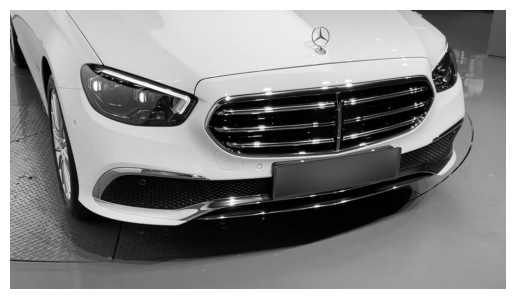

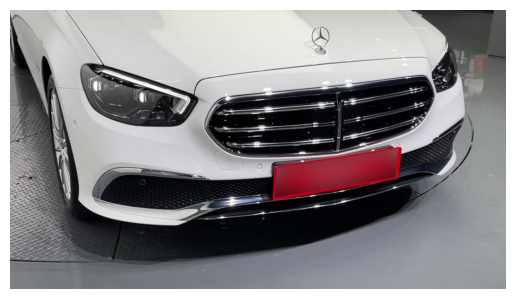

In [63]:
# 이미지 로드

plt.imshow(IMG, cmap='gray'), plt.axis('off')
plt.show()
type(IMG)

image_bgr = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis('off')
plt.show(block=True)

In [64]:
#이미지 저장

cv2.imwrite("../data/preprocess/gratscale/0001.jpg", IMG)

True

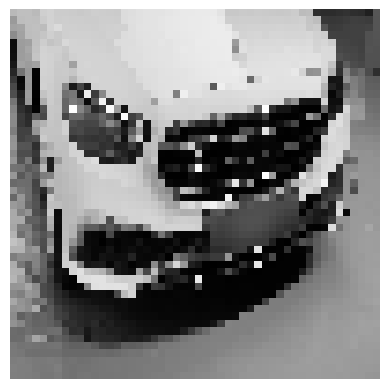

In [65]:
# 이미지 크기 변경

img_50x50 = cv2.resize(IMG, (50, 50))

plt.imshow(img_50x50, cmap="gray"), plt.axis("off")
plt.show()

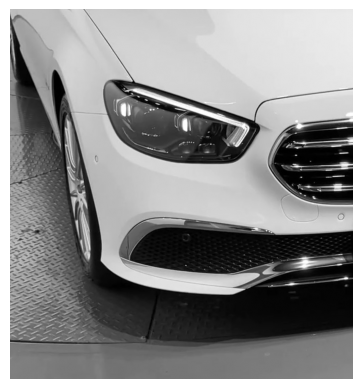

In [66]:
# 이미지 자르기

img_cropped = IMG[:, :1000] # y,x 로 가정했을 때 y는 세로(높이), x는 가로(너비)
plt.imshow(img_cropped, cmap="gray"), plt.axis("off")
plt.show()

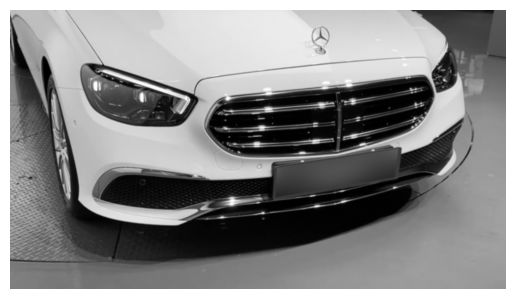

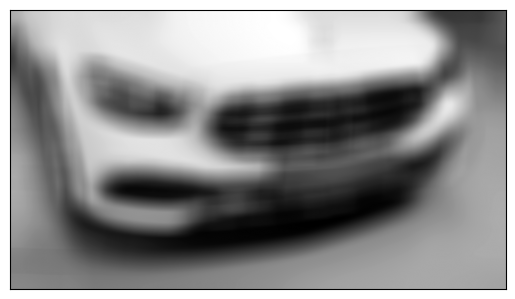

In [67]:
# 이미지 투명도 처리

img_blurry = cv2.blur(IMG, (5, 5))

plt.imshow(img_blurry, cmap="gray"), plt.axis("off")
plt.show()

img_very_blur = cv2.blur(IMG, (100, 100))
plt.imshow(img_very_blur, cmap="gray"), plt.xticks([], []), plt.yticks([], [])
plt.show()

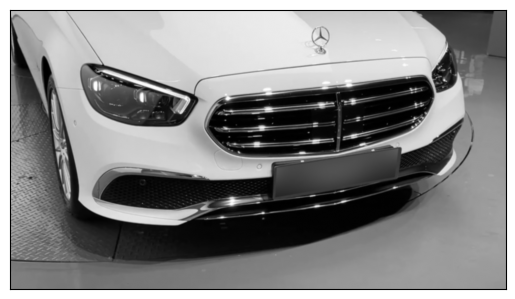

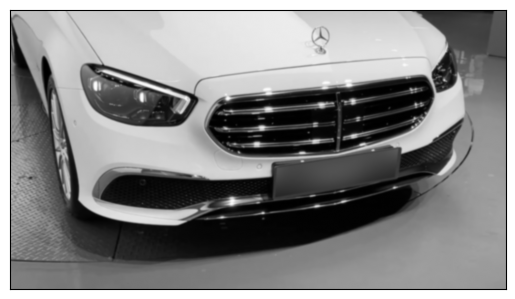

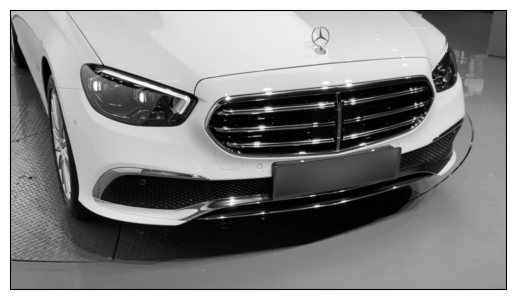

In [68]:
# 이미지 투명도 처리

kernel = np.ones((5, 5)) / 25.0

img_kernel = cv2.filter2D(IMG, -1, kernel)
plt.imshow(img_kernel, cmap="gray"), plt.xticks([], []), plt.yticks([], [])
plt.show()

img_blur = cv2.GaussianBlur(img_kernel, (11 , 11), 0)
plt.imshow(img_blur, cmap="gray"), plt.xticks([], []), plt.yticks([], [])
plt.show()

gaus_vector = cv2.getGaussianKernel(5, 0)
gaus_vector
gaus_kernel = np.outer(gaus_vector, gaus_vector)
gaus_kernel

img_kernel = cv2.filter2D(IMG, -2, gaus_kernel)
plt.imshow(img_kernel, cmap="gray"), plt.xticks([], []), plt.yticks([], [])
plt.show()

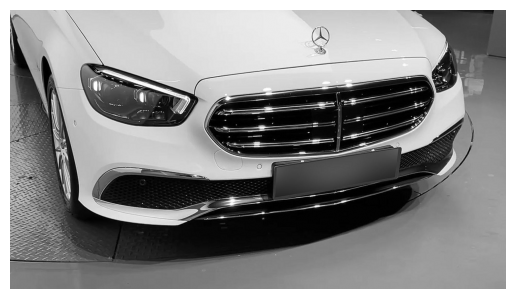

In [69]:
# 이미지 선명도

kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
img_sharp = cv2.filter2D(IMG, -1, kernel)
plt.imshow(img_sharp, cmap="gray"), plt.axis("off")
plt.show()

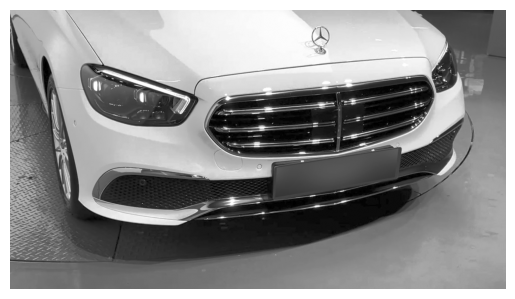

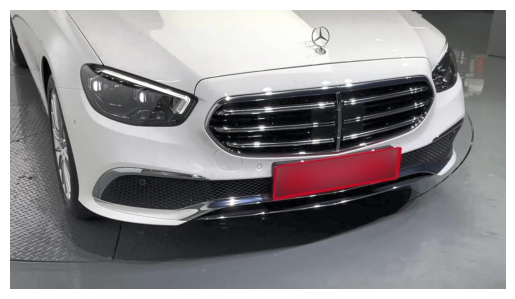

In [70]:
# 이미지 대비 높이기

img_enhanced = cv2.equalizeHist(IMG)
plt.imshow(img_enhanced, cmap="gray"), plt.axis("off")
plt.show()

img_bgr = cv2.imread(IMAGE_PATH)
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
img_yuv [:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
plt.imshow(img_rgb), plt.axis("off")
plt.show()

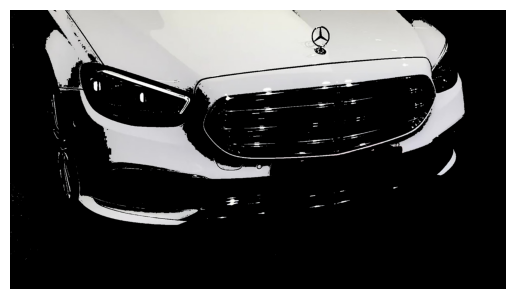

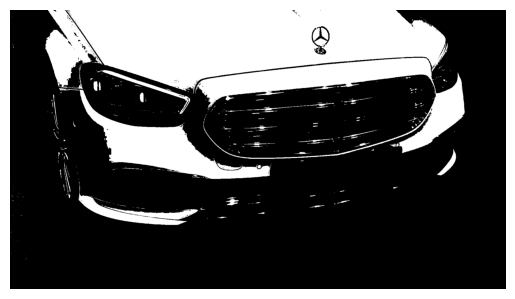

In [71]:
# 색상 구분

img_bgr = cv2.imread(IMAGE_PATH)
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0, 0, 200])
upper_blue = np.array([180, 30, 255])
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)
img_bgr_masked = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)
img_rgb = cv2.cvtColor(img_bgr_masked, cv2.COLOR_RGB2BGR)

plt.imshow(img_rgb), plt.axis("off")
plt.show()

plt.imshow(mask, cmap="gray"), plt.axis("off")
plt.show()

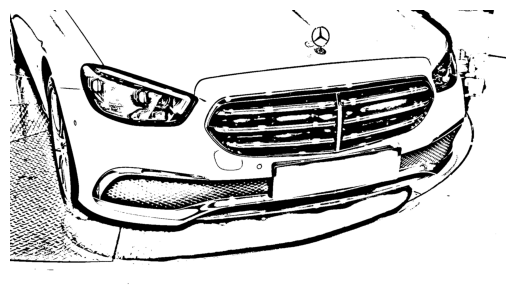

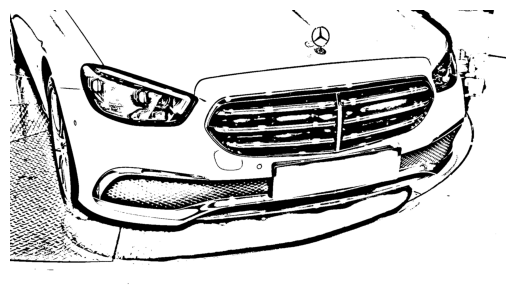

In [72]:
# 이미지 이진화
max_out_put_value = 200
neighborhood_size = 99
subtract_from_mean = 10
img_binarized = cv2.adaptiveThreshold(
    IMG,
    max_out_put_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    neighborhood_size,
    subtract_from_mean,
)

plt.imshow(img_binarized, cmap="gray"), plt.axis("off")
plt.show()

img_mean_threshold = cv2.adaptiveThreshold(
    IMG,
    max_out_put_value,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    neighborhood_size,
    subtract_from_mean,
)
plt.imshow(img_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

(1080, 1920)
(192, 216, 1152, 540)
(1080, 1920)
uint8


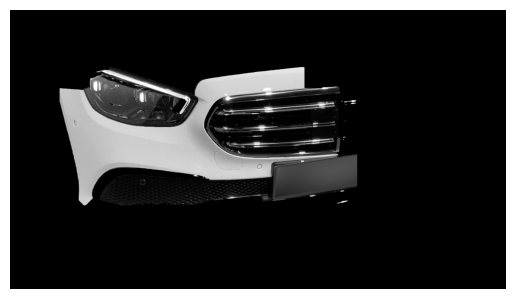

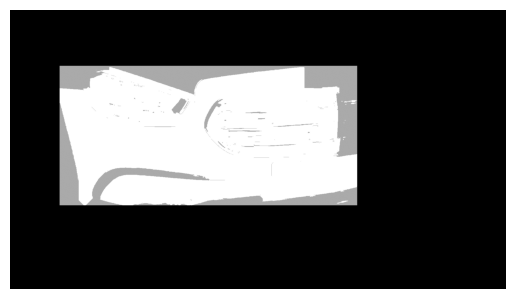

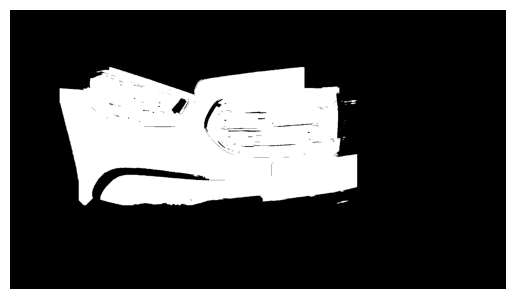

In [73]:
# 배경 제거

img_rgb = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
h, w = IMG.shape[:2]
x_ratio, y_ratio, w_ratio, h_ratio = 0.1, 0.2, 0.5, 0.3
x = int(w * x_ratio)
y = int(h * y_ratio)
rect_w = int(w * w_ratio)
rect_h = int(h * h_ratio)
print(IMG.shape)
rectangle = (x, y, x + rect_w, y + rect_h)
print(rectangle)
print(IMG.shape)
print(IMG.dtype)

mask = np.zeros(IMG.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(
    img_rgb,
    mask,
    rectangle,
    bgdModel,
    fgdModel,
    5,
    cv2.GC_INIT_WITH_RECT
)

mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

img_rgb_nodg = img_rgb * mask_2[:, :, np.newaxis]
plt.imshow(img_rgb_nodg, cmap="gray"), plt.axis("off")
plt.show()

plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()



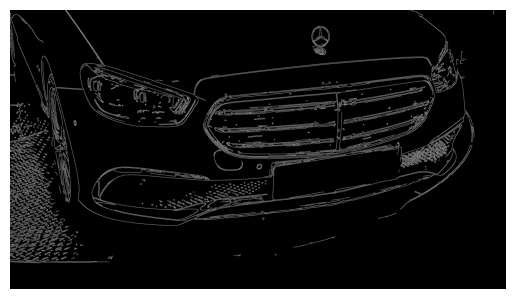

In [74]:
# 경계선 감지

median_intensity = np.median(IMG)

lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

img_canny = cv2.Canny(IMG, lower_threshold, upper_threshold)

plt.imshow(img_canny, cmap="gray"), plt.axis("off")
plt.show()


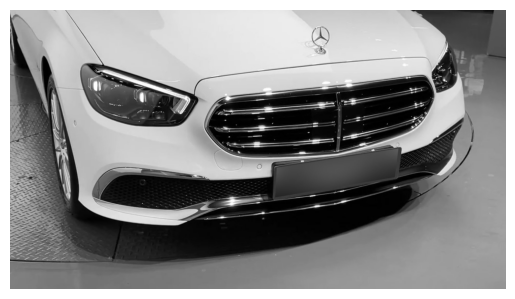

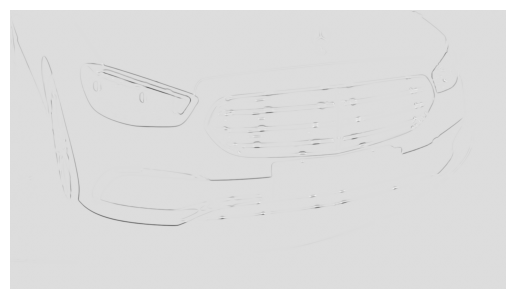

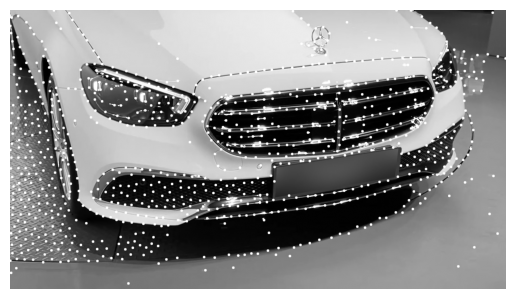

In [75]:
# 모서리 감지

img_bgr = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
img_gray = np.float32(IMG)

block_size = 2
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(
    img_gray,
    block_size,
    aperture,
    free_parameter,
)
detector_responses = cv2.dilate(
    detector_responses,
    None
)

threshold = 0.02
img_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]

img_gray = cv2.cvtColor(IMG, cv2.COLOR_GRAY2BGR)

plt.imshow(img_gray, cmap="gray"), plt.axis("off")
plt.show()

plt.imshow(detector_responses, cmap="gray"), plt.axis("off")
plt.show()

corners_to_detect = 1000
minimum_quality_score = 0.0005
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(
    IMG,
    corners_to_detect,
    minimum_quality_score,
    minimum_distance,
)

for corner in corners:
    x, y = corner[0]
    cv2.circle(img_bgr, (int(x), int(y)), 5, (255, 255, 255), -1)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb, cmap="gray"), plt.axis("off")
plt.show()

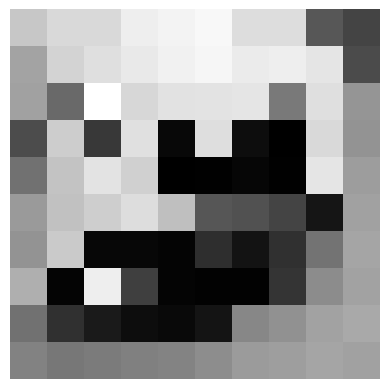

(65536,)

In [76]:
# 머신 러닝 특성 만들기

img_10x10 = cv2.resize(IMG, (10, 10))
img_10x10.flatten()

plt.imshow(img_10x10, cmap="gray"), plt.axis("off")
plt.show()

img_10x10.shape
img_10x10.flatten().shape

img_color_10x10 = cv2.resize(IMG_COLOR, (10, 10))
img_color_10x10.flatten().shape

img_256x256 = IMG
img_256x256.flatten().shape

img_256x256_color = cv2.resize(img_256x256, (256, 256))
img_256x256_color.flatten().shape

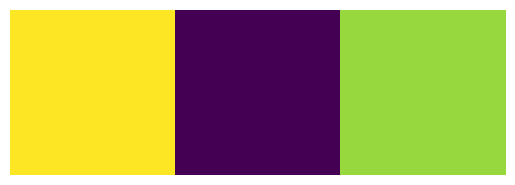

In [77]:
# 평균 색을 특성으로 인코딩

channels = cv2.mean(IMG_COLOR)

observation  = np.array([(
    channels[2],
    channels[1],
    channels[0],
)])

plt.imshow(observation), plt.axis("off")
plt.show()


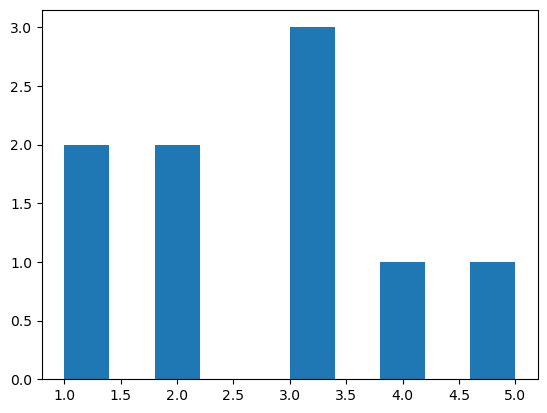

In [78]:
# 컬러 히스토그램을 특성 인코딩
img_rgb = cv2.cvtColor(IMG_COLOR, cv2.COLOR_BGR2RGB)
features = []
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img_rgb],
                            [i],
                            None,
                            [256],
                            [0, 256])
    features.extend(histogram)

observation = np.array(features).flatten()
observation[0:5]

img_rgb[0,0]

import pandas as pd

data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5,])
data.hist(grid=False)
plt.show()

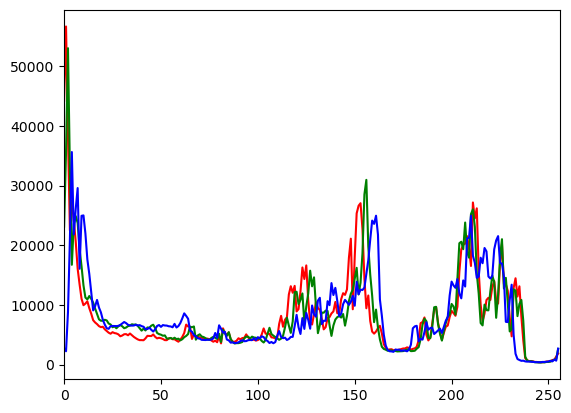

In [79]:
# 히스토그램을 출력

img_rgb = cv2.cvtColor(IMG_COLOR, cv2.COLOR_BGR2RGB)
features = []
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img_rgb],
                             [i],
                             None,
                             [256],
                             [0,256])
    plt.plot(histogram, color = channel)
    plt.xlim([0, 256])
plt.show()